# 서울글로벌센터 분기별 상담실적
데이터 링크 : http://data.seoul.go.kr/dataList/OA-15737/S/1/datasetView.do

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/일일 데이터 분석

/content/drive/MyDrive/일일 데이터 분석


In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('./서울글로벌센터 분기별 상담실적.csv', encoding='cp949')

In [9]:
data.head()

,년,기관/유형,1/4분기 실적,1/4분기 비율,2/4분기 실적,2/4분기 비율,3/4분기 실적,3/4분기 비율,4/4분기 실적,4/4분기 비율,해당년도 실적,해당년도 비율,이전년도 실적,이전년도 비율
0,2022,교육,488,7,406,7,433,7,182,5,1509,7,2393,7
1,2022,교통,20,0,36,1,68,1,34,1,158,1,93,0
2,2022,금융,48,1,83,1,58,1,57,1,246,1,280,1
3,2022,기타,480,7,450,7,481,8,289,7,1700,7,1877,6
4,2022,노무,1227,18,1310,21,1326,22,910,23,4773,21,5195,16


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   년         64 non-null     int64 
 1   기관/유형     64 non-null     object
 2   1/4분기 실적  64 non-null     int64 
 3   1/4분기 비율  64 non-null     int64 
 4   2/4분기 실적  64 non-null     int64 
 5   2/4분기 비율  64 non-null     int64 
 6   3/4분기 실적  64 non-null     int64 
 7   3/4분기 비율  64 non-null     int64 
 8   4/4분기 실적  64 non-null     int64 
 9   4/4분기 비율  64 non-null     int64 
 10  해당년도 실적   64 non-null     int64 
 11  해당년도 비율   64 non-null     int64 
 12  이전년도 실적   64 non-null     int64 
 13  이전년도 비율   64 non-null     int64 
dtypes: int64(13), object(1)
memory usage: 7.1+ KB


In [11]:
print(data['년'].unique(),'\n')
print(data['년'].value_counts())

[2022 2021 2020 2019] 

2022    16
2021    16
2020    16
2019    16
Name: 년, dtype: int64


In [12]:
print(data['기관/유형'].unique(),'\n')
print(data['기관/유형'].value_counts())

['교육' '교통' '금융' '기타' '노무' '문화/관광' '보건/복지' '비즈니스' '실 근무일' '안전' '여성/가족'
 '정보통신' '주거' '출입국' '합계' '행정'] 

교육       4
교통       4
금융       4
기타       4
노무       4
문화/관광    4
보건/복지    4
비즈니스     4
실 근무일    4
안전       4
여성/가족    4
정보통신     4
주거       4
출입국      4
합계       4
행정       4
Name: 기관/유형, dtype: int64


In [13]:
print(data[data['년'] == 2022]['해당년도 비율'].sum(), data[data['년'] == 2022]['이전년도 비율'].sum())
print(data[data['년'] == 2021]['해당년도 비율'].sum(), data[data['년'] == 2021]['이전년도 비율'].sum())
print(data[data['년'] == 2020]['해당년도 비율'].sum(), data[data['년'] == 2020]['이전년도 비율'].sum())
print(data[data['년'] == 2019]['해당년도 비율'].sum(), data[data['년'] == 2019]['이전년도 비율'].sum())

201 199
200 199
199 199
200 200


In [14]:
# 해당년도와 이전년도 실적 불일치
df = data[(data['기관/유형'] == '합계')].reset_index(drop=True)
df

,년,기관/유형,1/4분기 실적,1/4분기 비율,2/4분기 실적,2/4분기 비율,3/4분기 실적,3/4분기 비율,4/4분기 실적,4/4분기 비율,해당년도 실적,해당년도 비율,이전년도 실적,이전년도 비율
0,2022,합계,6841,100,6190,100,6142,100,3941,100,23114,100,31955,100
1,2021,합계,7273,100,7042,100,10085,100,5174,100,29574,100,36252,100
2,2020,합계,8323,100,9938,100,10786,100,4595,100,33642,100,33070,100
3,2019,합계,8658,100,9097,100,8080,100,5267,100,31102,100,35875,100


0    23114
1    29574
2    33642
3    31102
Name: 해당년도 실적, dtype: int64


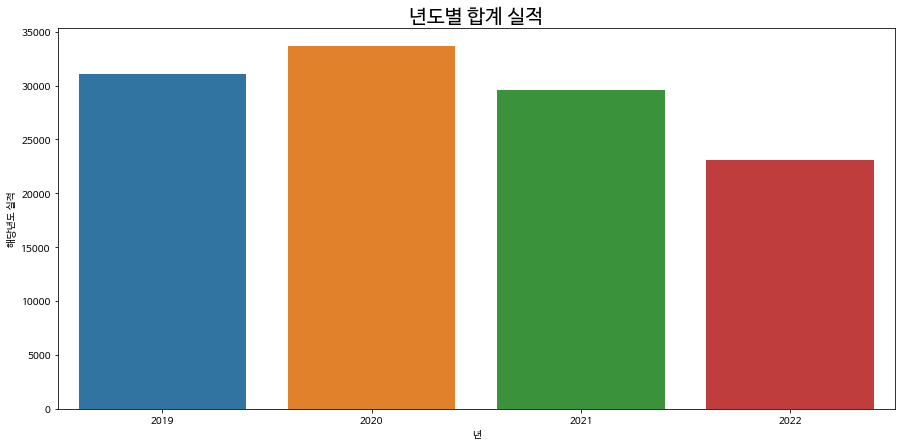

In [15]:
# 년도별 합계 실적 비교
print(df['해당년도 실적'])
plt.figure(figsize=(15,7))
sns.barplot(x = df['년'], y = df['해당년도 실적'])
plt.title('년도별 합계 실적',size=20)
plt.show()

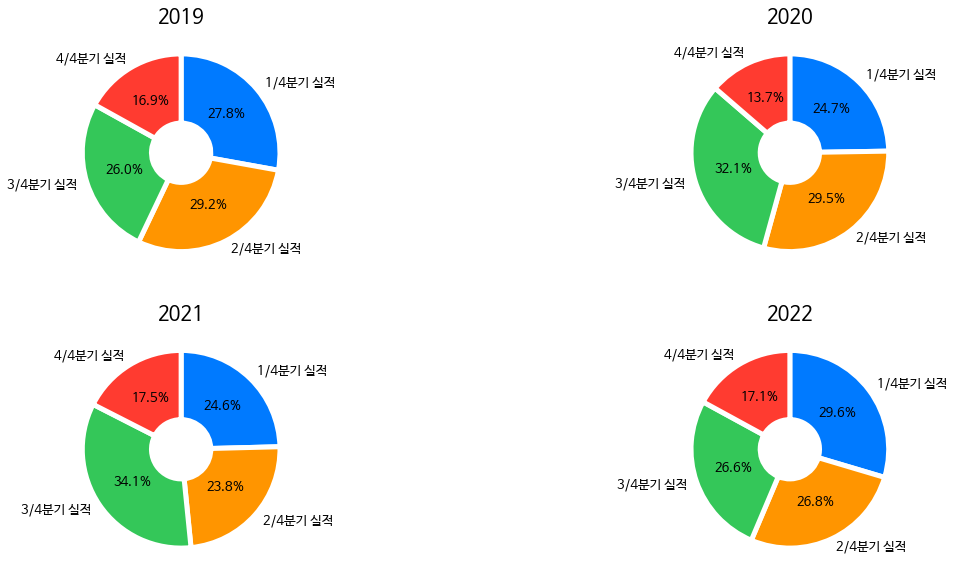

In [16]:
# 년도별 분기 실적 비교
raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

light_palette = np.array(raw_light_palette)/255
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize=(20,10))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.pie(df.iloc[3-i,range(2,9,2)],
          labels=df.columns[range(2,9,2)],
          autopct='%.1f%%',
          startangle=90,
          counterclock=False,
          wedgeprops=wedgeprops,
          colors=light_palette,
          textprops = {'fontsize':13})
  plt.title(df.iloc[3-i,0],size=20)
plt.show()

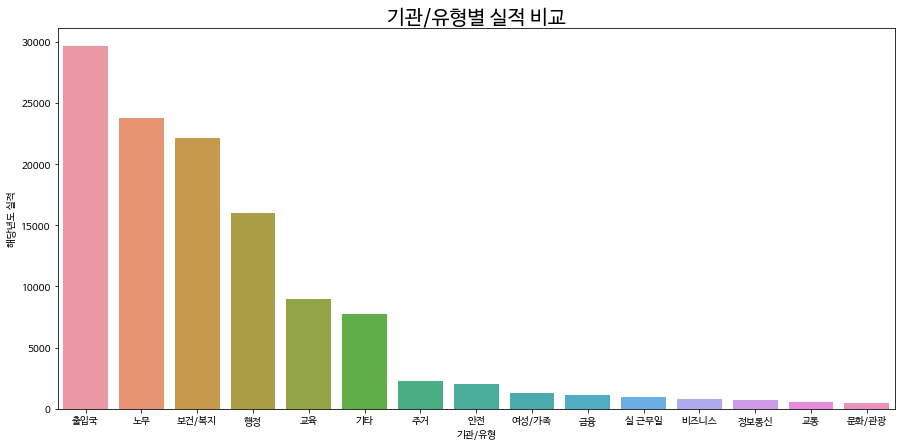

In [17]:
# 기관/유형별 실적 비교
df = data[data['기관/유형'] != '합계'].groupby('기관/유형').sum().sort_values('해당년도 실적')[::-1]
plt.figure(figsize=(15,7))
sns.barplot(x= df.index, y= df['해당년도 실적'])
plt.title('기관/유형별 실적 비교',size=20)
plt.show()

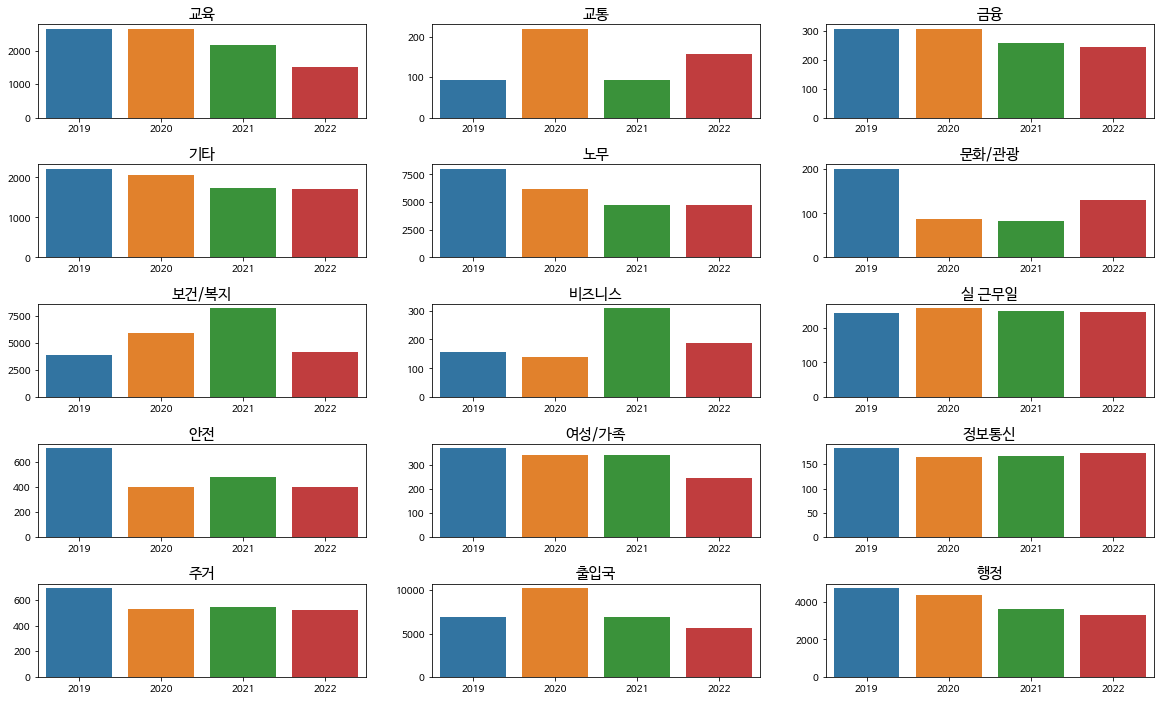

In [18]:
# 년도별 기관/유형별 실적
df = data[data['기관/유형'] != '합계']
cat = df['기관/유형'].unique()
plt.figure(figsize=(20,12))
for i in range(len(cat)):
  plt.subplot(len(cat)/3,3,i+1)
  plt.subplots_adjust(hspace=0.5)
  d = df[df['기관/유형'] == cat[i]]
  sns.barplot(x=d['년'], y = d['해당년도 실적'])
  plt.xlabel('')
  plt.ylabel('')
  plt.title(cat[i], size=15)

In [19]:
# 년도별 가장 실적이 좋았던 기관/유형
df = data[data['기관/유형'] != '합계']
for year in [2019,2020,2021,2022]:
  d = df[df['년'] == year]
  max = d[d['해당년도 실적'] == d['해당년도 실적'].max()].iat[0,1]
  min = d[d['해당년도 실적'] == d['해당년도 실적'].min()].iat[0,1]
  print(f'{year}\n최고실적 : {max}\n최저실적 : {min}\n')

2019
최고실적 : 노무
최저실적 : 교통

2020
최고실적 : 출입국
최저실적 : 문화/관광

2021
최고실적 : 보건/복지
최저실적 : 문화/관광

2022
최고실적 : 출입국
최저실적 : 문화/관광

